In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

In [42]:
data = pd.read_csv('kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [43]:
data.shape

(400, 26)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [45]:
data = data.drop('id',axis=1)

In [46]:
data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [47]:
data.columns = ['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells',
                'pus_cell','pus_cell_clumps','bacteria','blood_glucose_random','blood_urea',
                'serum_creatinine','sodium','potassium','haemoglobin','packed_cell_volume',
                'white_blood_cell_count','red_blood_cell_count','hypertension','diabetes_mellitus',
                'coronary_artery_disease','appetite','peda_edema','anemia','class']

In [48]:
data.head(4)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd


### Convert object to numeric 

In [49]:
cols = ['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']
for col in cols:
    print(f"{col} : {data[col].dtype}")

packed_cell_volume : object
white_blood_cell_count : object
red_blood_cell_count : object


In [50]:
def convert_text_to_numeric(data,column):
    data[column] = pd.to_numeric(data[column],errors='coerce')

for col in cols:
    convert_text_to_numeric(data,col)
    print(f"{col} : {data[col].dtype}")

packed_cell_volume : float64
white_blood_cell_count : float64
red_blood_cell_count : float64


In [51]:
missing = data.isnull().sum()
missing[missing>0].sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
dtype: int64

In [52]:
def mean_value(data,column):
    mean_value = data[column].mean()
    data[column].fillna(value=mean_value,inplace=True)

def mode_value(data,column):
    mode_value = data[column].mode()[0]
    data[column] = data[column].fillna(mode_value)

In [53]:
num_cols = [col for col in data.columns if data[col].dtype !='object']

for col in num_cols:
    mean_value(data,col)

In [54]:
cat_cols =[col for col in data.columns if data[col].dtype =='object']

for col in cat_cols:
    mode_value(data,col)

In [55]:
missing = data.isnull().sum()
missing[missing>0].sort_values(ascending=False)

Series([], dtype: int64)

In [56]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [57]:
print(f"diabetes_mellitus : {data['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease : {data['coronary_artery_disease'].unique()}")
print(f"class : {data['class'].unique()}")

diabetes_mellitus : ['yes' 'no' ' yes' '\tno' '\tyes']
coronary_artery_disease : ['no' 'yes' '\tno']
class : ['ckd' 'ckd\t' 'notckd']


In [58]:
data['diabetes_mellitus'] = data['diabetes_mellitus'].replace(to_replace={' yes':'yes','\tyes':'yes','\tno':'no'})
data['coronary_artery_disease'] = data['coronary_artery_disease'].replace(to_replace={'\tno':'no'})
data['class'] = data['class'].replace(to_replace={'ckd\t':'ckd'})

In [59]:
print(f"diabetes_mellitus : {data['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease : {data['coronary_artery_disease'].unique()}")
print(f"class : {data['class'].unique()}")

diabetes_mellitus : ['yes' 'no']
coronary_artery_disease : ['no' 'yes']
class : ['ckd' 'notckd']


In [64]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'anemia',
 'class']

In [66]:
for col in cat_cols:
    print(data[col].unique())

['normal' 'abnormal']
['normal' 'abnormal']
['notpresent' 'present']
['notpresent' 'present']
['yes' 'no']
['yes' 'no']
['no' 'yes']
['good' 'poor']
['no' 'yes']
['no' 'yes']
['ckd' 'notckd']


## Encoding

In [68]:
data['class'] = data['class'].map({'ckd':1,'notckd':0})
data['red_blood_cells'] = data['red_blood_cells'].map({'normal':1,'abnormal':0})
data['pus_cell'] = data['pus_cell'].map({'normal':1,'abnormal':0})
data['pus_cell_clumps'] = data['pus_cell_clumps'].map({'present':1,'notpresent':0})
data['bacteria'] = data['bacteria'].map({'present':1,'notpresent':0})
data['hypertension'] = data['hypertension'].map({'yes':1,'no':0})
data['diabetes_mellitus'] = data['diabetes_mellitus'].map({'yes':1,'no':0})
data['coronary_artery_disease'] = data['coronary_artery_disease'].map({'yes':1,'no':0})
data['appetite'] = data['appetite'].map({'good':1,'poor':0})
data['peda_edema'] = data['peda_edema'].map({'yes':1,'no':0})
data['anemia'] = data['anemia'].map({'yes':1,'no':0})

In [69]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0,0,0,1,0,0,1


<Axes: >

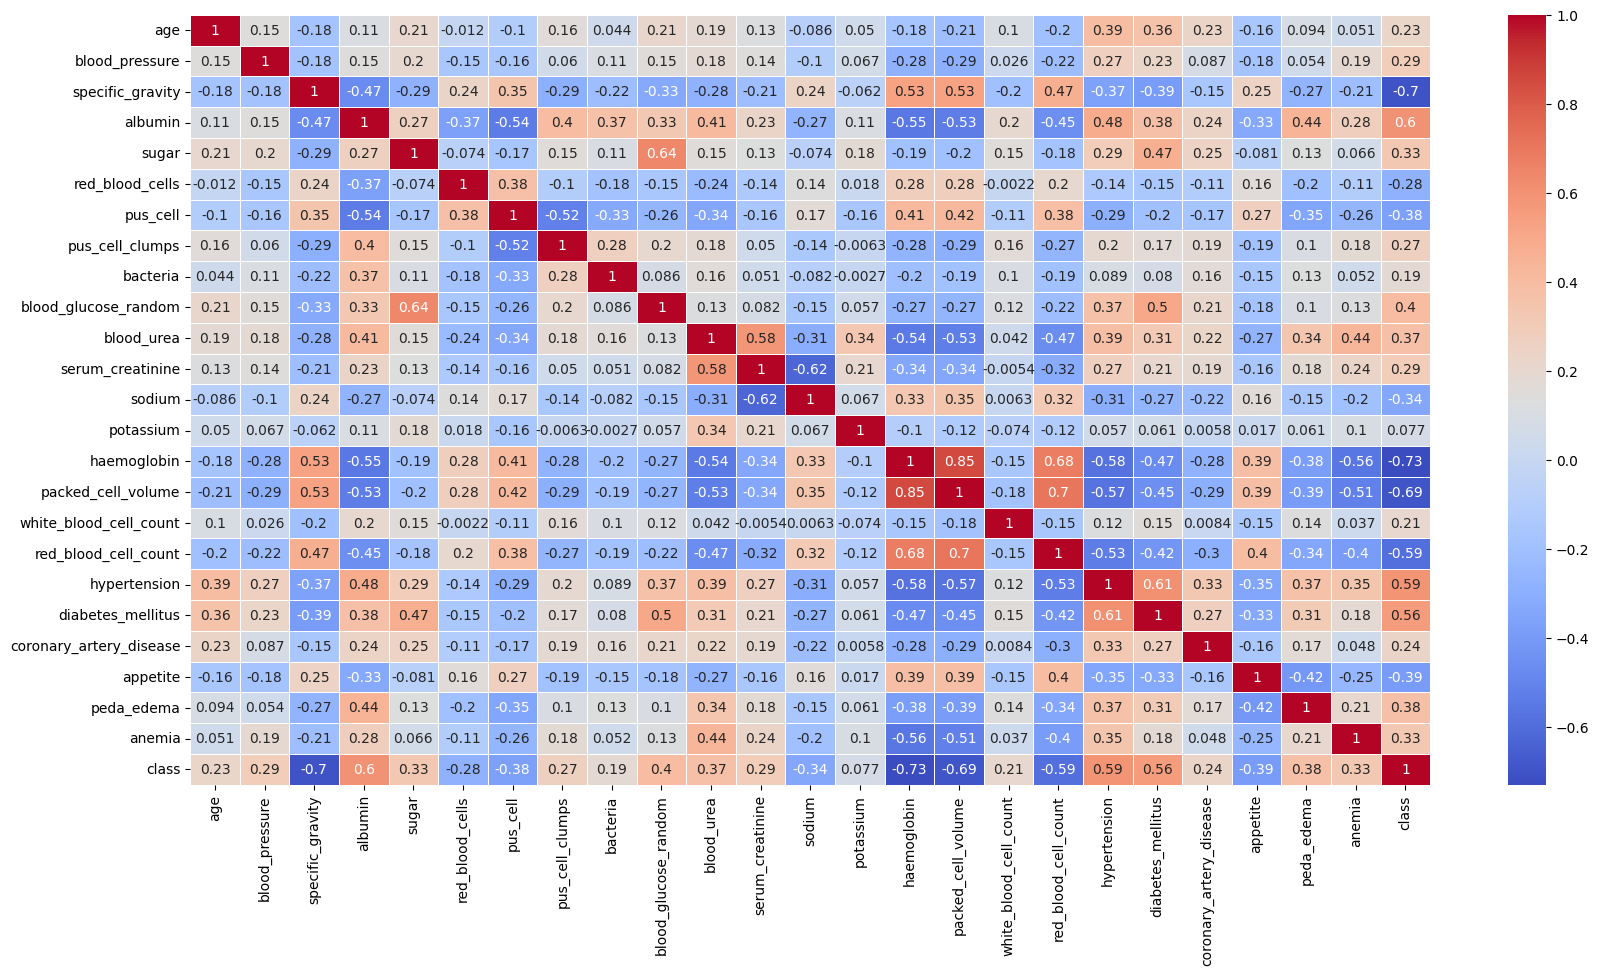

In [75]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,linewidths=0.5,cmap='coolwarm')

In [76]:
target_corr = data.corr()['class'].abs().sort_values(ascending=False)[1:]
target_corr

haemoglobin                0.729628
specific_gravity           0.698957
packed_cell_volume         0.690060
albumin                    0.599238
red_blood_cell_count       0.590913
hypertension               0.590438
diabetes_mellitus          0.559060
blood_glucose_random       0.401374
appetite                   0.393341
pus_cell                   0.375154
peda_edema                 0.375154
blood_urea                 0.372033
sodium                     0.342288
sugar                      0.327812
anemia                     0.325396
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.225405
white_blood_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64

In [78]:
data['class'].value_counts()

class
1    250
0    150
Name: count, dtype: int64

## Model Building

In [79]:
X = data.drop('class',axis=1)
Y = data['class']

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=25)


In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [82]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [84]:
models = []
models.append(('Naive Bayes',GaussianNB()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=8)))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('SVC',SVC(kernel='linear')))

In [89]:
for name,model in models:
    print(name,model)
    print()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    print('f1_score: ',f1_score(y_test,y_pred))
    print('recall_score: ',recall_score(y_test,y_pred))
    print('precision_score: ',precision_score(y_test,y_pred))
    print('accuracy_score: ',accuracy_score(y_test,y_pred))
    print('\n')

Naive Bayes GaussianNB()

[[37  0]
 [ 5 58]]
f1_score:  0.9586776859504132
recall_score:  0.9206349206349206
precision_score:  1.0
accuracy_score:  0.95


KNN KNeighborsClassifier(n_neighbors=8)

[[31  6]
 [18 45]]
f1_score:  0.7894736842105263
recall_score:  0.7142857142857143
precision_score:  0.8823529411764706
accuracy_score:  0.76


DecisionTreeClassifier DecisionTreeClassifier()

[[35  2]
 [ 1 62]]
f1_score:  0.9763779527559056
recall_score:  0.9841269841269841
precision_score:  0.96875
accuracy_score:  0.97


RandomForestClassifier RandomForestClassifier()

[[35  2]
 [ 0 63]]
f1_score:  0.984375
recall_score:  1.0
precision_score:  0.9692307692307692
accuracy_score:  0.98


SVC SVC(kernel='linear')

[[34  3]
 [ 2 61]]
f1_score:  0.9606299212598425
recall_score:  0.9682539682539683
precision_score:  0.953125
accuracy_score:  0.95


